In [1]:
# regression: https://machinelearningmastery.com/xgboost-for-regression/
# classifier: https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xgboost
print(xgboost.__version__)

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

1.6.1


In [2]:
depev_final = pd.read_csv('depev_final.csv')
depev_final.drop(depev_final.columns[depev_final.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
depev_final.head()

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,...,ANGEV_A,CHDEV_A,CHLEV_A,HYPEV_A,PHSTAT_A,AVAIL_A,INTV_QRT,WTFA_A,WTIA_A,POVRATTC_A
0,4,9,3,0,60000,2,2,122,3,2,...,2,2,1,2,3,1,1,13177.008,7601.336,2.96
1,4,9,3,0,50000,0,2,122,2,1,...,2,2,2,2,1,1,1,6140.552,3344.434,2.97
2,4,12,3,0,65000,1,2,122,2,1,...,2,2,1,1,3,1,1,9191.061,6949.498,4.28
3,4,14,5,0,120000,0,2,122,1,8,...,2,2,2,1,2,1,1,7900.035,6446.327,7.13
4,1,4,1,0,30000,0,2,115,2,1,...,1,1,1,1,4,1,1,10875.772,8646.586,1.13


In [3]:
depev_final.shape

(31959, 163)

n_estimators: The number of trees in the ensemble, often increased until no further improvements are seen.

max_depth: The maximum depth of each tree, often values are between 1 and 10.

eta: The learning rate used to weight each model, often set to small values such as 0.3, 0.1, 0.01, or smaller.

subsample: The number of samples (rows) used in each tree, set to a value between 0 and 1, often 1.0 to use all samples.

colsample_bytree: Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 to use all features.

In [4]:
# create an xgboost regression model
model = xgboost.XGBRegressor()

In [33]:
# split data into input and output columns, training and testing data
depev_data = depev_final.sample(frac=1)

# rerun at 50/50
train = depev_data.sample(frac=0.5)
print('Train:' + str(train.shape))

test = depev_data.sample(frac=0.5)
print('Test:' + str(test.shape))

x_train, y_train = train.drop(['DEPEV_A'], axis=1), train['DEPEV_A']
x_test, y_test = test.drop(['DEPEV_A'], axis=1), test['DEPEV_A']

Train:(15980, 163)
Test:(15980, 163)


In [20]:
y_train.head()

23088    2
14987    2
15556    2
4264     2
31842    2
Name: DEPEV_A, dtype: int64

In [21]:
y_train.value_counts()

2    21168
1     4376
9       23
Name: DEPEV_A, dtype: int64

In [34]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [35]:
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.145 (0.009)


In [36]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.8963809116480467

In [37]:
model = xgboost.XGBRegressor()
model.fit(x_train, y_train)

Predicted: 1.976


In [ ]:
yhat = model.predict(x_test)
print('Predicted: %.3f' % yhat[0])

In [38]:
model.score(x_test, y_test)

0.6809073346992567

Here we will use an XGBoost classifier:

In [12]:
x = depev_final.drop(['DEPEV_A'], axis=1)
y = depev_final['DEPEV_A']

In [13]:
seed = 7
test_size = 0.33
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [15]:
y2_train.head()

14931    2
24159    1
19724    2
9056     1
28195    2
Name: DEPEV_A, dtype: int64

In [16]:
y2_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 21412 entries, 14931 to 28847
Series name: DEPEV_A
Non-Null Count  Dtype
--------------  -----
21412 non-null  int64
dtypes: int64(1)
memory usage: 334.6 KB


In [19]:
y2_train.value_counts()

2    17761
1     3636
9       15
Name: DEPEV_A, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y2_train = le.fit_transform(y2_train)

In [28]:
classifier = XGBClassifier()
classifier.fit(x2_train, y2_train)
print(classifier)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)


What is happening here???

In [29]:
classifier.score(x2_train, y2_train)

0.9920138240239118

This is the accuracy score (pretty high) for the regression model above:

In [57]:
y_pred = model.predict(x2_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y2_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.10%


And this is the accuracy score for the classifier, which is very low:

In [58]:
y_pred = classifier.predict(x2_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y2_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 4.52%


In [59]:
model.score(x2_test, y2_test)

0.6415998960332137

In [56]:
classifier.score(x2_test, y2_test)

0.04522613065326633

Here we analyze feature importance:

In [ ]:
# https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
# https://predictivehacks.com/feature-importance-in-python/

In [43]:
feature_importances=pd.DataFrame({'features':x.columns,'feature_importance':classifier.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
90,DEPMED_A,0.259740
142,ANXEV_A,0.070408
91,DEPFREQ_A,0.040654
85,PHQ82_A,0.011383
92,ANXMED_A,0.009525
...,...,...
50,HISP_A,0.000000
122,HIKIND05_A,0.000000
36,CHIP_A,0.000000
120,HIKIND07_A,0.000000


In [40]:
print(classifier.feature_importances_)

[0.00352262 0.00322791 0.00420817 0.00343808 0.00412859 0.00311672
 0.00389982 0.00393993 0.00394973 0.00366891 0.00431249 0.00616684
 0.00604175 0.00494392 0.00372553 0.00313941 0.00501842 0.00471613
 0.00446578 0.         0.00431261 0.00359246 0.00437557 0.00368864
 0.00385475 0.00409548 0.00360048 0.00396652 0.00388161 0.00399619
 0.00374433 0.00385024 0.         0.00071357 0.00360701 0.0037199
 0.         0.00176025 0.00223075 0.00304377 0.00389517 0.00392599
 0.0055971  0.00242857 0.00459626 0.00424845 0.00388371 0.00318874
 0.00447537 0.00415005 0.         0.00385573 0.00571434 0.00399378
 0.00670819 0.0035619  0.00409919 0.00327995 0.00498812 0.00512782
 0.00390673 0.00334307 0.00447866 0.00510926 0.00382367 0.005038
 0.00424683 0.0040755  0.00404422 0.00352901 0.         0.00375227
 0.00367747 0.00401334 0.00364988 0.00333114 0.00475593 0.00351596
 0.00447153 0.00382169 0.00288543 0.0047317  0.00350141 0.00425346
 0.00486333 0.01138295 0.00287152 0.00509918 0.0040858  0.0092075

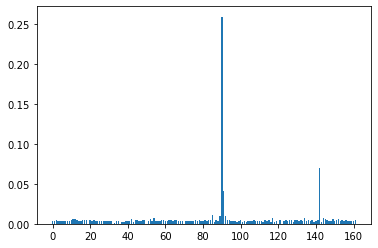

In [41]:
plt.bar(range(len(classifier.feature_importances_)), classifier.feature_importances_)
plt.show()